# Logistic Regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data Set

In [2]:
train_data = pd.read_csv('micro_data_train.csv')

In [3]:
train_data.head()

,micro_test_1,micro_test_2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
micro_test_1    118 non-null float64
micro_test_2    118 non-null float64
accepted        118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.8 KB


In [5]:
train_data.describe()

,micro_test_1,micro_test_2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [6]:
test_data = pd.read_csv('micro_data_test.csv')
test_data.head()

,micro_test_1,micro_test_2
0,0.051267,0.69956


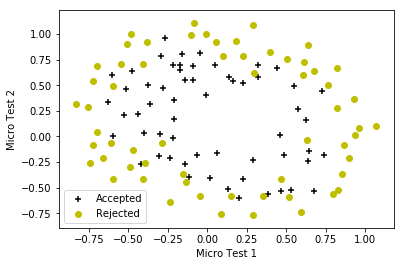

In [7]:
train_data_0 = train_data[train_data.accepted == 0]
train_data_1 = train_data[train_data.accepted == 1]
plt.scatter(train_data_1.iloc[:, 0], train_data_1.iloc[:, 1], marker='+', color='black')
plt.scatter(train_data_0.iloc[:, 0], train_data_0.iloc[:, 1], marker='o', color='y')
plt.xlabel('Micro Test 1')
plt.ylabel('Micro Test 2')
plt.legend(labels=['Accepted', 'Rejected'])
plt.show()

## Feature Separation and Normalization

In [8]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1:].values
m = y_train.shape[0]

In [9]:
X_test = test_data.iloc[:, :].values

In [10]:
def map_features(x1, x2):
    degree = 6
    mapped_result = np.ones((x1.shape[0], sum(range(degree + 2))))
    current_col = 1
    for i in range(1, degree + 1):
        for j in range(i + 1):
            mapped_result[:, current_col] = np.power(x1, i - j)
            np.power(x2, j)
            current_col += 1
    return mapped_result

In [11]:
X_train_mapped = map_features(X_train[:, 0], X_train[:, 1])
X_test_mapped = map_features(X_test[:, 0], X_test[:, 1])

## Gradient Descent

In [12]:
def sigmoid(input_var):
    sigmoid_result = 1 / (1 + np.exp(-input_var))
    return sigmoid_result

In [13]:
def cost_grad_reg(X, y, theta, lambda_val):
    z = np.matmul(X, theta)
    hx = sigmoid(z)
    neg_0_cost = (-1 * (1 - y)) * np.log((1 - hx))
    pos_1_cost = (-1 * y) * np.log(hx)
    cost_normal = (pos_1_cost + neg_0_cost) / m
    cost_reg = (lambda_val / (2 * m)) * np.sum(np.power(theta[1, :], 2))
    cost_normal_sum = np.sum(cost_normal)
    cost = cost_normal_sum + cost_reg

    error_value = hx - y
    error_value_final = np.matmul(error_value.T, X)
    delta = error_value_final / m
    delta_reg = (lambda_val / m) * theta.T
    delta_reg[0] = 0
    delta_total = delta + delta_reg
    return [cost, delta_total]

In [14]:
alpha = 0.1
lambda_value = 1
theta_value = np.zeros((X_train_mapped.shape[1], 1))
[cost, delta_total_result] = cost_grad_reg(X_train_mapped, y_train, theta_value, lambda_value)
print(cost)
print(delta_total_result)

0.6931471805599451
[[0.00847458 0.01878809 0.00847458 0.05034464 0.01878809 0.00847458
  0.01835599 0.05034464 0.01878809 0.00847458 0.03934862 0.01835599
  0.05034464 0.01878809 0.00847458 0.01997075 0.03934862 0.01835599
  0.05034464 0.01878809 0.00847458 0.03103124 0.01997075 0.03934862
  0.01835599 0.05034464 0.01878809 0.00847458]]
